In [37]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
# Data loading

df_raw = pd.read_csv('datastes/online_course_engagement_data.csv')

print(f"Raw dataset size: {df_raw.shape}")
df_raw

Raw dataset size: (9000, 9)


,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0
...,...,...,...,...,...,...,...,...,...
8995,8757,Health,37.445225,14,4,54.469359,32.990704,1,0
8996,894,Science,48.631443,7,7,59.413257,0.254625,0,0
8997,6323,Health,38.212512,3,3,69.508297,70.188159,1,0
8998,3652,Health,70.048665,13,10,79.655182,72.975225,1,1


In [5]:
# Preprocessing

df_raw.describe()

,UserID,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,4498.894556,50.163822,10.024667,5.090556,74.706028,50.340146,0.500667,0.396444
std,2596.849433,28.491750,6.029878,3.157762,14.378383,28.950977,0.500027,0.489186
min,1.000000,1.005230,0.000000,0.000000,50.005119,0.009327,0.000000,0.000000
25%,2251.750000,25.440548,5.000000,2.000000,62.283451,25.653614,0.000000,0.000000
50%,4483.500000,49.818417,10.000000,5.000000,74.743294,50.264124,1.000000,0.000000
75%,6751.250000,75.069924,15.000000,8.000000,87.022663,75.572493,1.000000,1.000000
max,9000.000000,99.992558,20.000000,10.000000,99.994984,99.979711,1.000000,1.000000


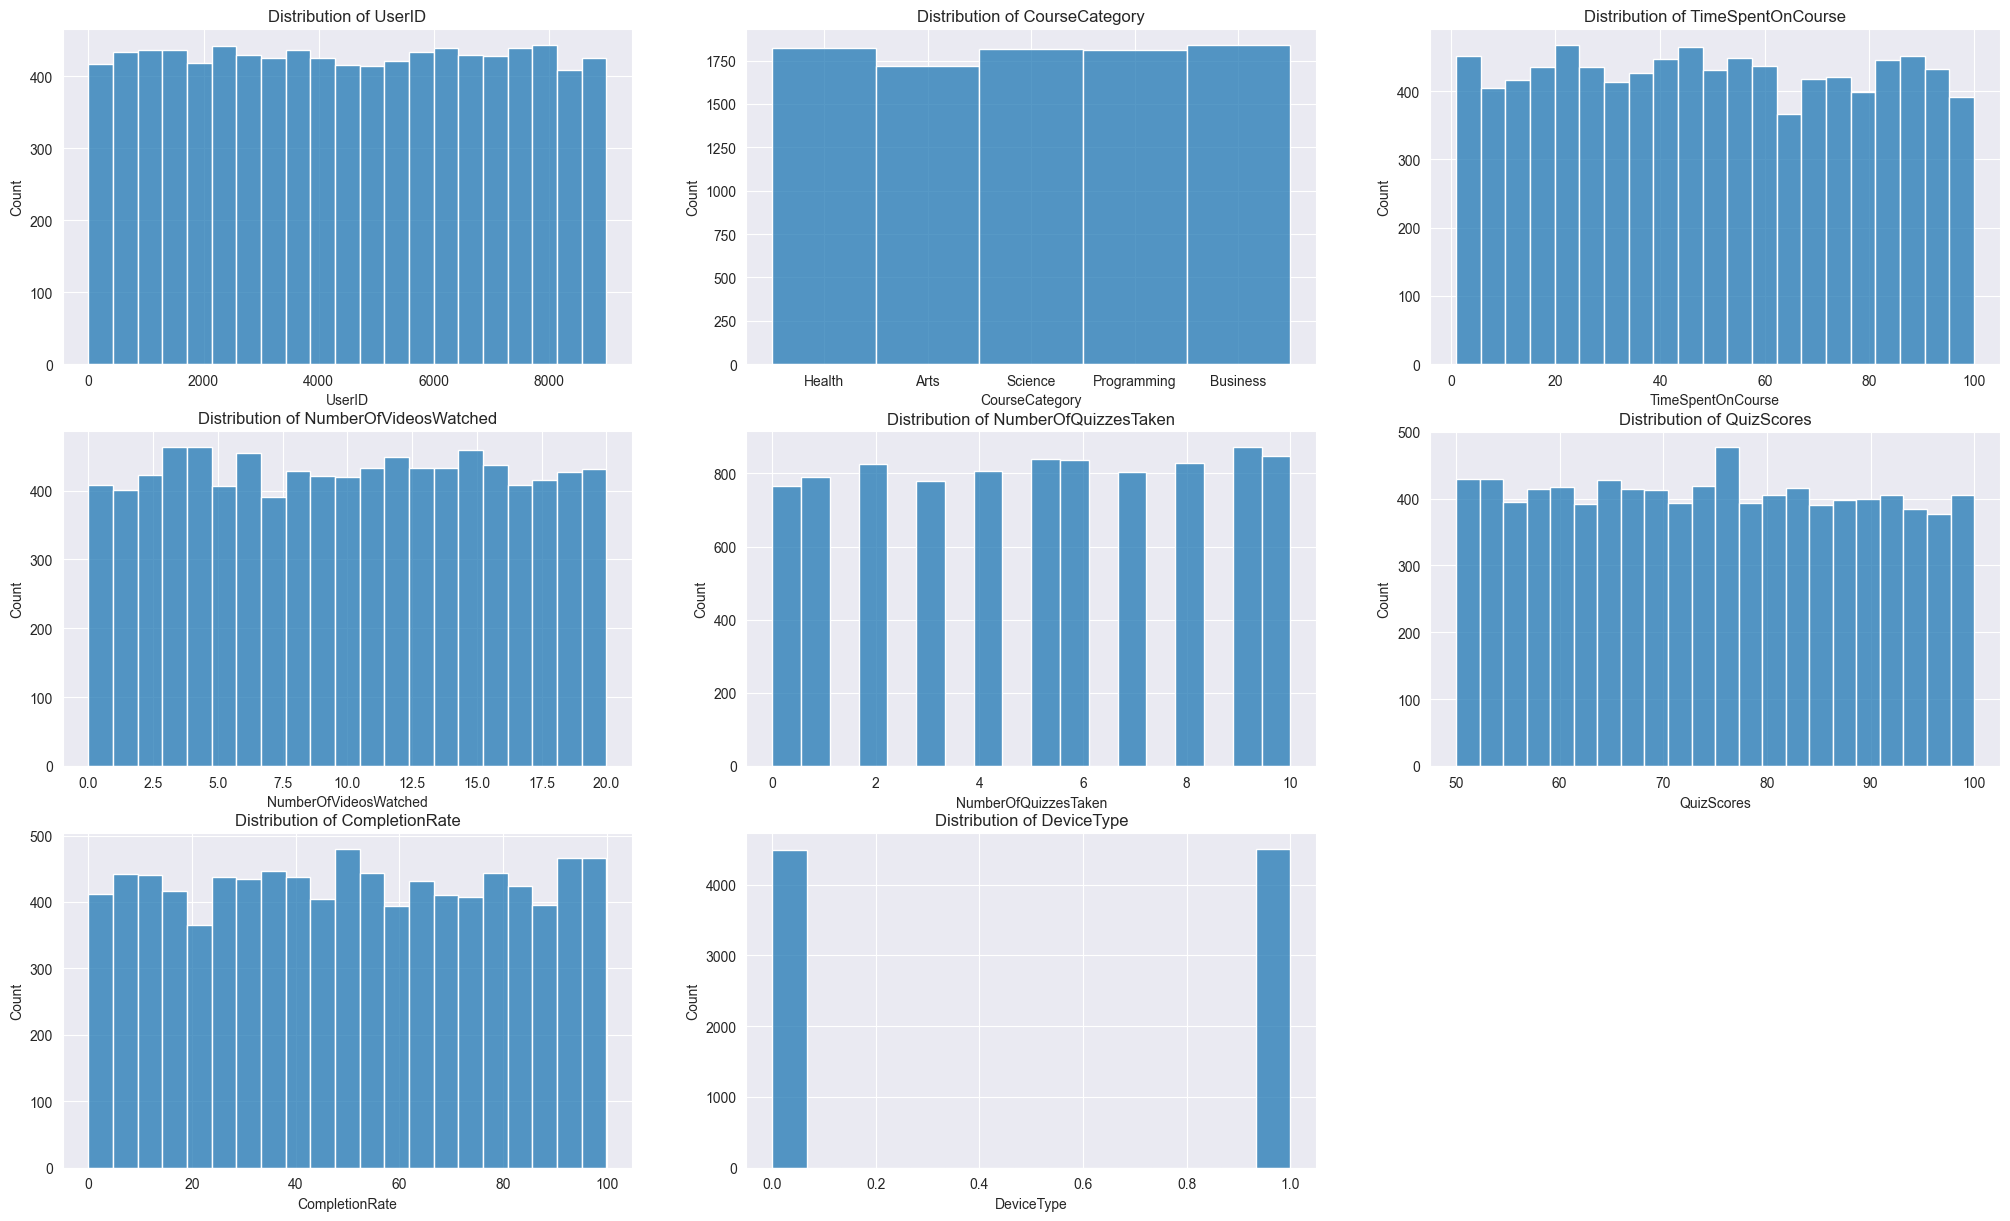

In [13]:
plt.figure(figsize=(25, 20))

for i, col in enumerate(df_raw.columns[:-1], 1):
    plt.subplot(len(df_raw.columns)//3+1, 3, i)
    sns.histplot(df_raw[col])
    plt.title(f'Distribution of {col}')

In [16]:
df = pd.get_dummies(df_raw, columns=['CourseCategory']).astype(float)

df2 = df.drop(columns=['CourseCompletion'], axis=1)

df2['CourseCompletion'] = df_raw.CourseCompletion

df = df2

df

,UserID,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCategory_Arts,CourseCategory_Business,CourseCategory_Health,CourseCategory_Programming,CourseCategory_Science,CourseCompletion
0,5618.0,29.979719,17.0,3.0,50.365656,20.860773,1.0,0.0,0.0,1.0,0.0,0.0,0
1,4326.0,27.802640,1.0,5.0,62.615970,65.632415,1.0,1.0,0.0,0.0,0.0,0.0,0
2,5849.0,86.820485,14.0,2.0,78.458962,63.812007,1.0,1.0,0.0,0.0,0.0,0.0,1
3,4992.0,35.038427,17.0,10.0,59.198853,95.433162,0.0,0.0,0.0,0.0,0.0,1.0,1
4,3866.0,92.490647,16.0,0.0,98.428285,18.102478,0.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,8757.0,37.445225,14.0,4.0,54.469359,32.990704,1.0,0.0,0.0,1.0,0.0,0.0,0
8996,894.0,48.631443,7.0,7.0,59.413257,0.254625,0.0,0.0,0.0,0.0,0.0,1.0,0
8997,6323.0,38.212512,3.0,3.0,69.508297,70.188159,1.0,0.0,0.0,1.0,0.0,0.0,0
8998,3652.0,70.048665,13.0,10.0,79.655182,72.975225,1.0,0.0,0.0,1.0,0.0,0.0,1


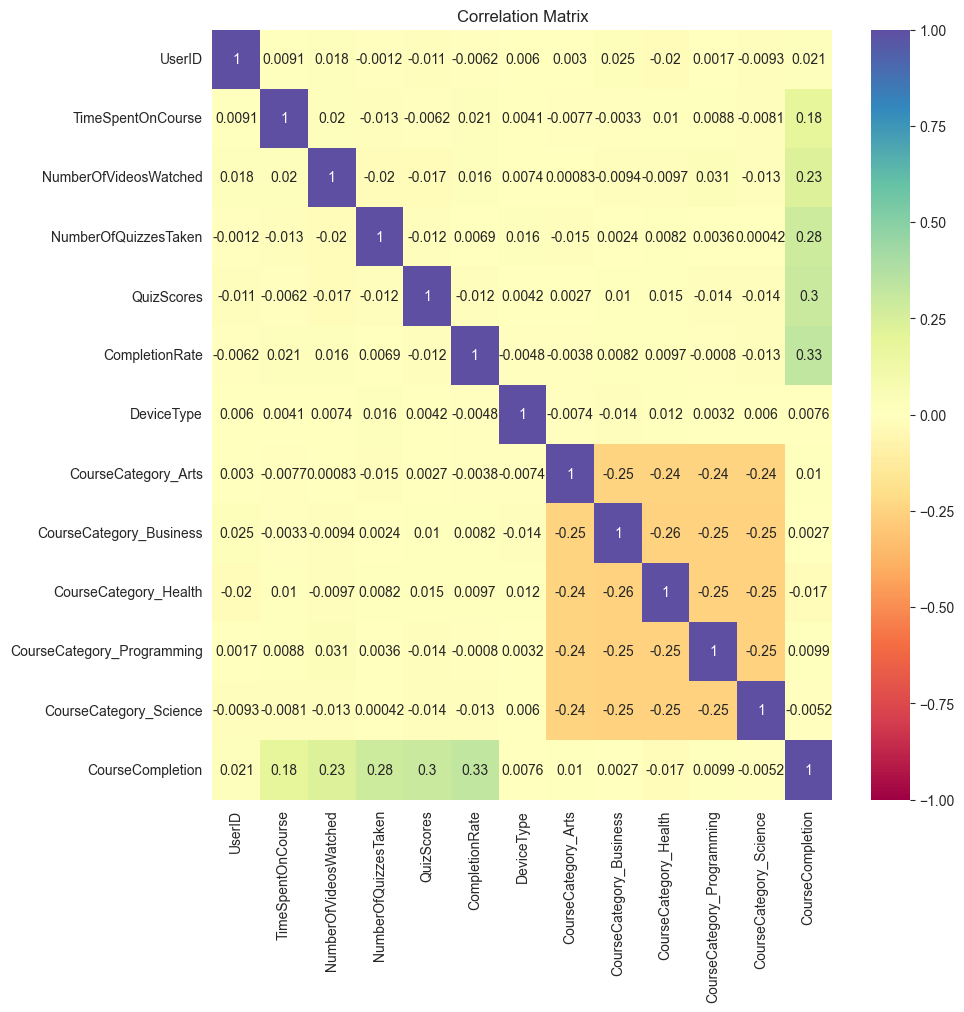

In [24]:
plt.figure(figsize=(10,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [33]:
tr = StandardScaler()
print(df.shape)
df_scaled = tr.fit_transform(df.drop(['CourseCompletion'], axis=1))

(9000, 13)


(9000, 12)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df.CourseCompletion, test_size=0.15)

print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")

Training samples: 7650, Test samples: 1350


In [55]:
def analyze(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(10,10))
    sns.heatmap(confusion_matrix(y_test, y_pred).astype(int), annot=True, fmt='d', cmap='coolwarm')

    plt.tight_layout()
    plt.show()

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       813
           1       0.76      0.71      0.74       537

    accuracy                           0.80      1350
   macro avg       0.79      0.78      0.79      1350
weighted avg       0.80      0.80      0.80      1350



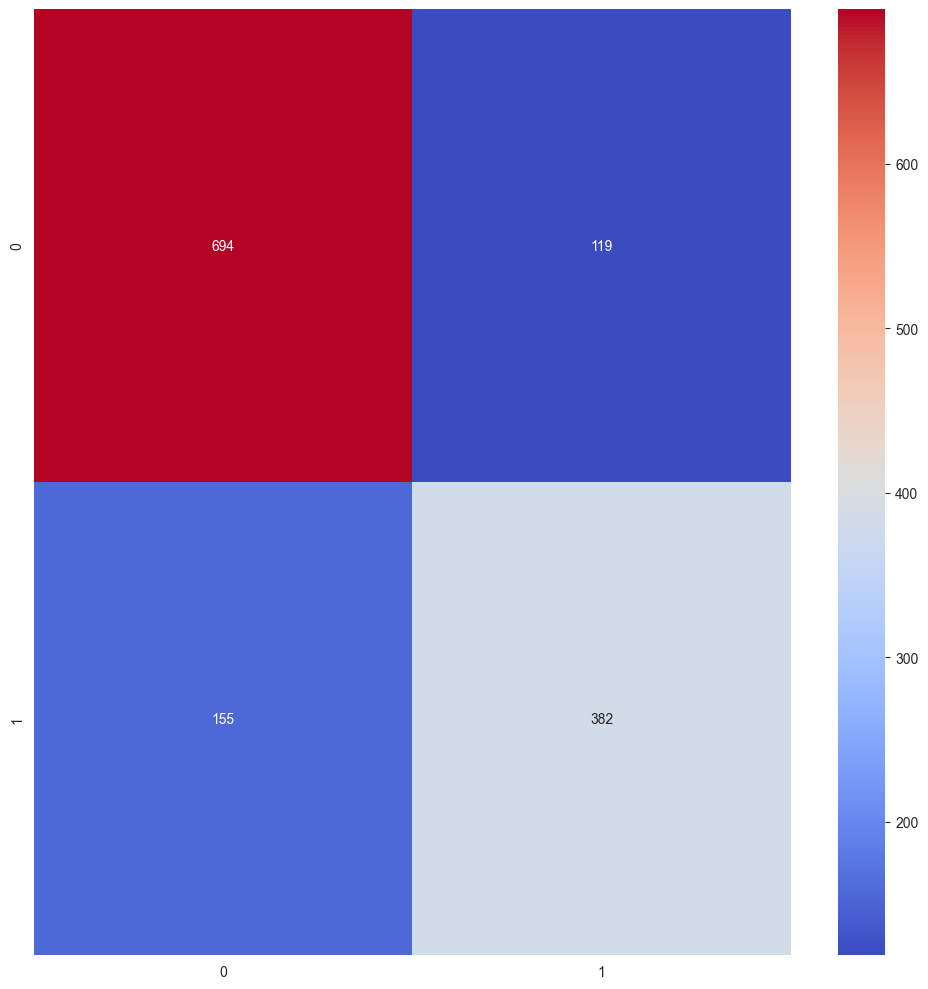

In [56]:
# Linear models

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

analyze(lda)

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       813
           1       0.76      0.71      0.73       537

    accuracy                           0.80      1350
   macro avg       0.79      0.78      0.78      1350
weighted avg       0.79      0.80      0.79      1350



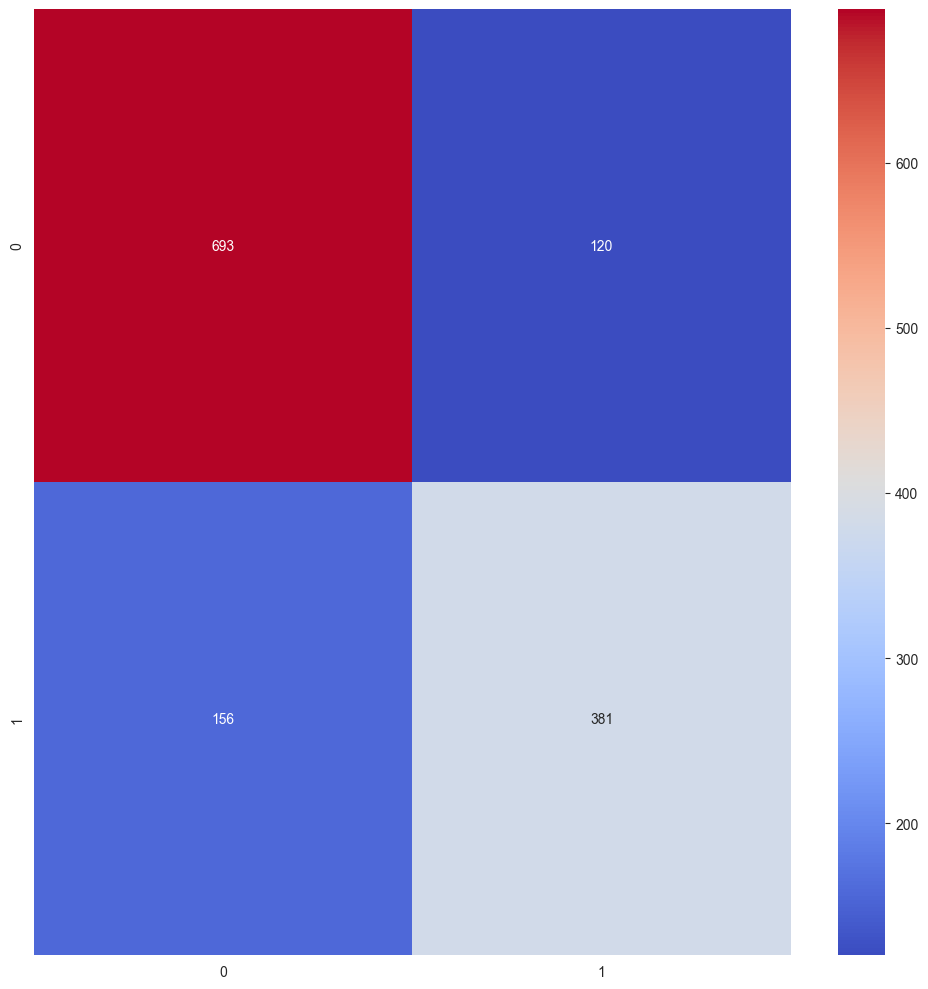

In [57]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

analyze(lr)

In [60]:
# Non linear

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': np.linspace(0.1,10,3),
    'gamma': np.linspace(0.01,1,100),
}

svc = SVC()
grid_search = GridSearchCV(svc, param_grid, refit=True, verbose=2)


In [61]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV] END ..................................C=0.1, gamma=0.01; total time=   1.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.9s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.9s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.9s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.9s
[CV] END ..................................C=0.1, gamma=0.02; total time=   0.8s
[CV] END ..................................C=0.1, gamma=0.02; total time=   0.8s
[CV] END ..................................C=0.1, gamma=0.02; total time=   0.8s
[CV] END ..................................C=0.1, gamma=0.02; total time=   0.8s
[CV] END ..................................C=0.1, gamma=0.02; total time=   0.8s
[CV] END ..................................C=0.1, gamma=0.03; total time=   0.8s
[CV] END ..................................C=

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([ 0.1 ,  5.05, 10.  ]),
                         'gamma': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             verbose=2)

In [62]:
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'C': 5.05, 'gamma': 0.3}


              precision    recall  f1-score   support

           0       0.89      0.90      0.90       813
           1       0.85      0.83      0.84       537

    accuracy                           0.87      1350
   macro avg       0.87      0.87      0.87      1350
weighted avg       0.87      0.87      0.87      1350



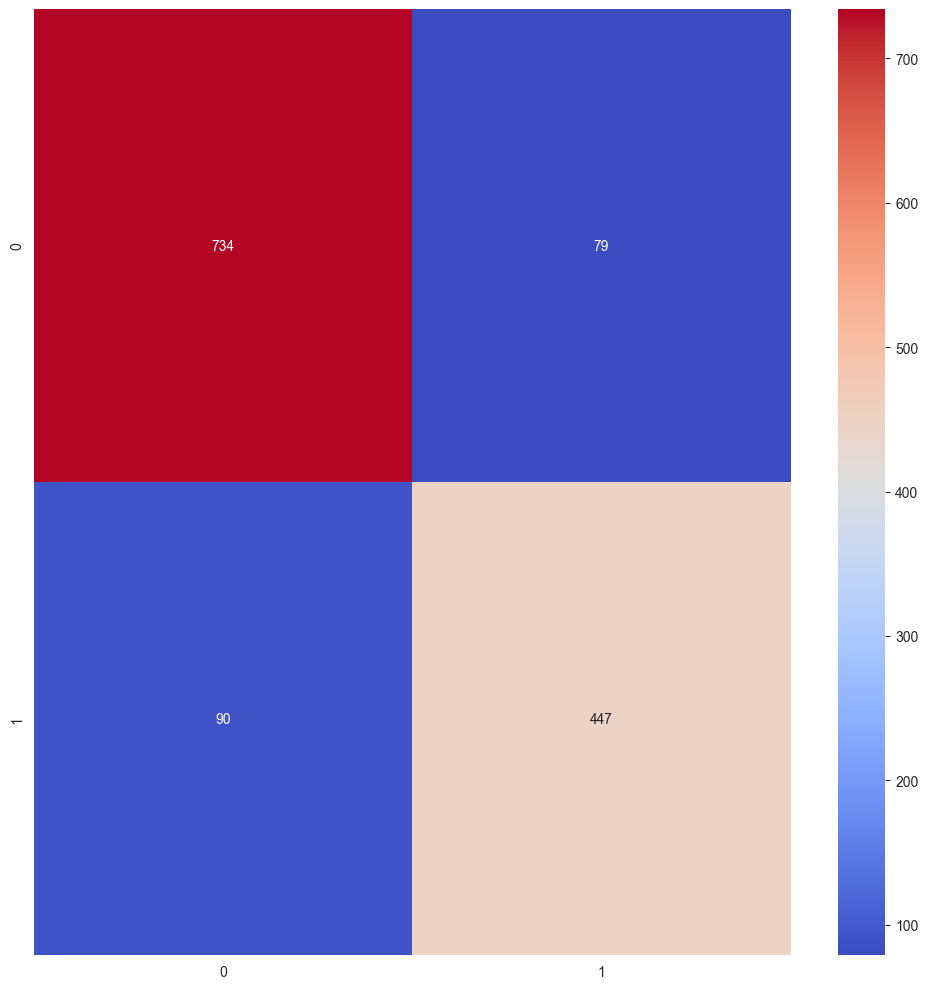

In [64]:
analyze(grid_search)

In [73]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors' : np.linspace(3,10,8).astype(int),
    'weights' : ['uniform', 'distance'],
    'p' : np.linspace(1,4,4).astype(int),
    'metric' : ['minkowski', 'chebyshev', 'hamming', 'canberra', 'cosine']
}

print(param_grid)

grid_search = GridSearchCV(knn, param_grid, cv=5, verbose=2)

{'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10]), 'weights': ['uniform', 'distance'], 'p': array([1, 2, 3, 4]), 'metric': ['minkowski', 'chebyshev', 'hamming', 'canberra', 'cosine']}


In [74]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.1s
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.1s
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.1s
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END metric=mi

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'chebyshev', 'hamming',
                                    'canberra', 'cosine'],
                         'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10]),
                         'p': array([1, 2, 3, 4]),
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [75]:
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}


In [76]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=10, p=1, weights='distance')

In [77]:
grid_search

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'chebyshev', 'hamming',
                                    'canberra', 'cosine'],
                         'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10]),
                         'p': array([1, 2, 3, 4]),
                         'weights': ['uniform', 'distance']},
             verbose=2)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       813
           1       0.85      0.79      0.82       537

    accuracy                           0.86      1350
   macro avg       0.86      0.85      0.85      1350
weighted avg       0.86      0.86      0.86      1350



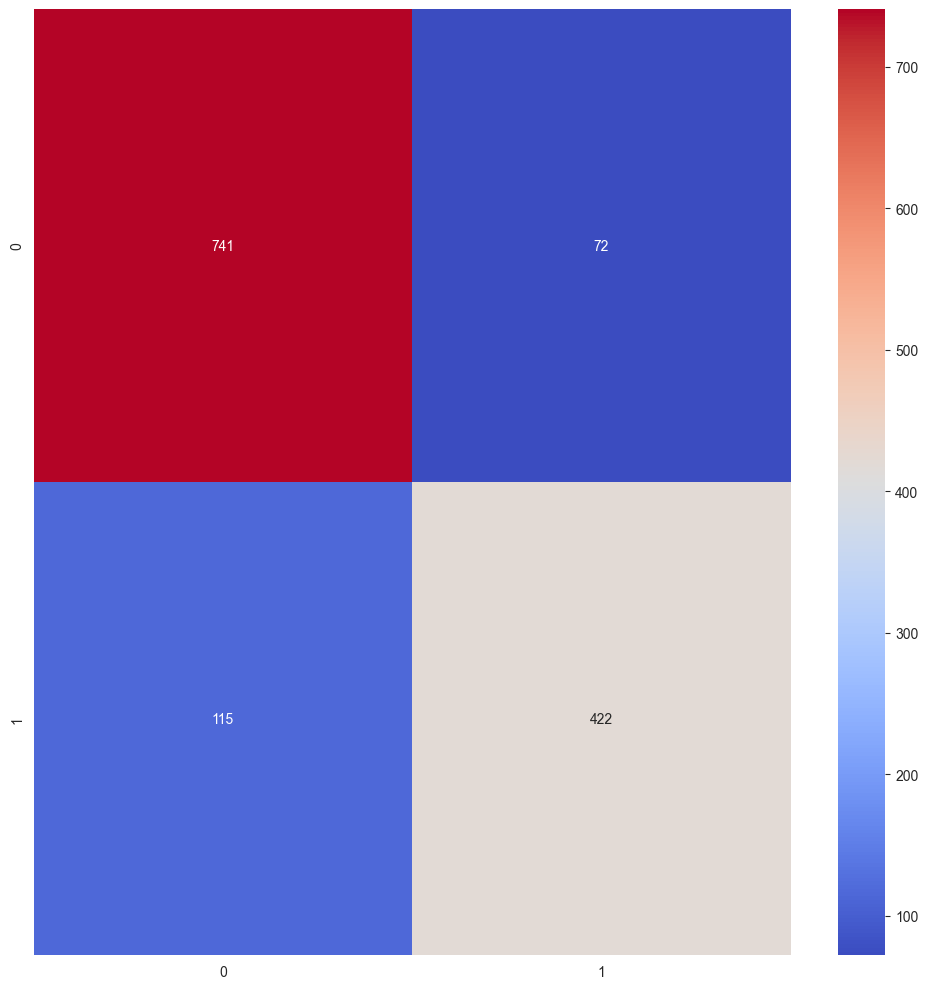

In [78]:
analyze(grid_search.best_estimator_)

In [82]:
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier()

param_grid = {
    'max_features' : [None, 'sqrt', 'log2'],
    'max_depth' : np.linspace(5,10,6).astype(int),
    'min_samples_split' : np.linspace(2,5,4).astype(int),
}

grid_search = GridSearchCV(dt, param_grid=param_grid, verbose=2, cv=5)

In [83]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END max_depth=5, max_features=None, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=None, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=None, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=None, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=None, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=None, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_features=None, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_features=None, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_features=None, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_features=None, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_features=None, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_features=None, min_sa

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 5,  6,  7,  8,  9, 10]),
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_split': array([2, 3, 4, 5])},
             verbose=2)

In [84]:
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_split': 2}


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       813
           1       0.96      0.96      0.96       537

    accuracy                           0.97      1350
   macro avg       0.97      0.96      0.97      1350
weighted avg       0.97      0.97      0.97      1350



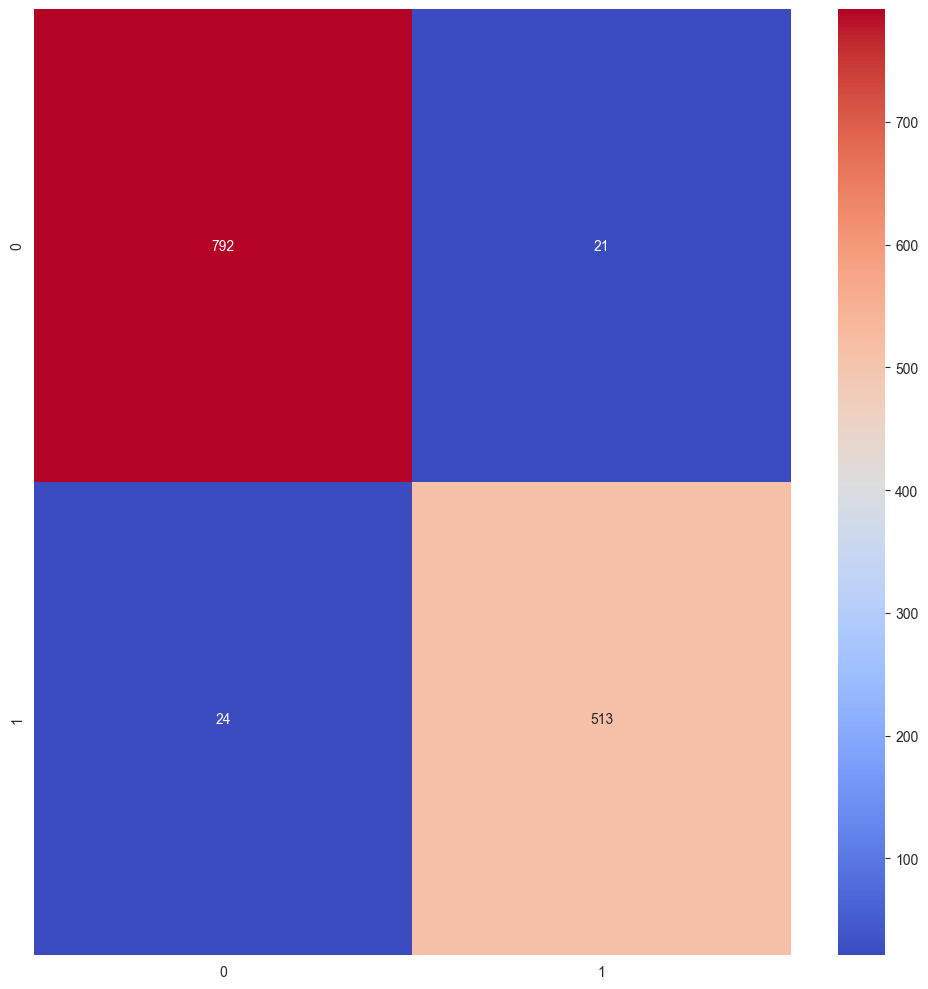

In [85]:
analyze(grid_search.best_estimator_)

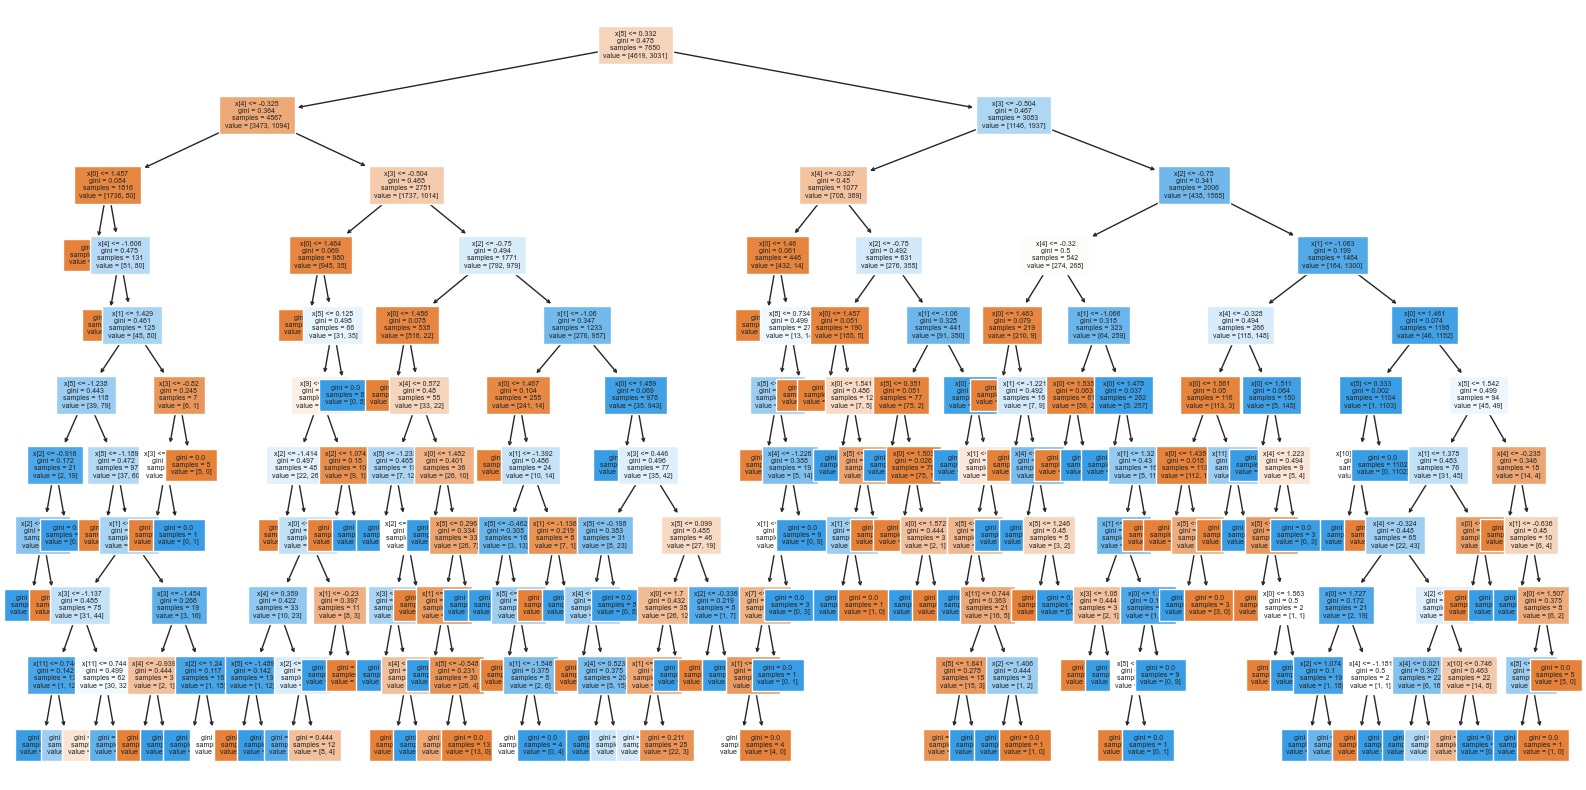

In [91]:
from sklearn.tree import plot_tree

# Visualize the Tree
plt.figure(figsize=(20,10))
plot_tree(grid_search.best_estimator_, filled=True, fontsize=5)
plt.show()